# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from MADDPG import MADDPG

seed = 4

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis", seed=seed, worker_id=3)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
env_info.rewards

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.5625515  -1.5
 -0.          0.         -7.51403332  6.         -0.          0.        ]


[0.0, 0.0]

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [6]:
MAX_EPISODES = 5000
SOLVED_SCORE = 0.5    # FOR TESTING ONLY - should be 0.5
WINDOW_SIZE = 100       # FOR TESTING ONLY - should be 100
PRINT_EVERY = 10
ADD_NOISE = True
STOP_IF_NO_IMPROVEMENT_OVER_EPISODES = 300
RAND_SEED = 6

agents = MADDPG(num_agents, state_size, action_size, seed)
agents.load()

In [7]:
def maddpg():
    # initialize scores
    scores_window = deque(maxlen=WINDOW_SIZE)
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    env_solved = False

    for i_episode in range(1, MAX_EPISODES + 1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = np.reshape(env_info.vector_observations, (1, num_agents * state_size))  # flatten states
        agents.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = agents.act(states, ADD_NOISE)  # choose agent actions and flatten them
            env_info = env.step(actions)[brain_name]  # send both agents' actions to the environment
            next_states = np.reshape(env_info.vector_observations, (1, num_agents * state_size))  # flatten next states
            rewards = env_info.rewards  # get rewards
            done = env_info.local_done  # see if the episode finished
            agents.step(states, actions, rewards, next_states, done)  # perform the learning step
            scores += np.max(rewards)  # update scores with best reward
            states = next_states  # roll over states to next time step
            if np.any(done):  # exit loop if episode finished
                break

        ep_best_score = np.max(scores)  # record best score for episode
        scores_window.append(ep_best_score)  # add score to recent scores
        scores_all.append(ep_best_score)  # add score to history of all scores
        moving_average.append(np.mean(scores_window))  # recalculate moving average

        # save best score
        if ep_best_score > best_score and ep_best_score > 0:
            best_score = ep_best_score
            best_episode = i_episode
            print('New best score found on episode {:d}; score = {:.3f}'.format(best_episode, best_score))

        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode - PRINT_EVERY, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))
            agents.save()

        # determine if environment is solved and keep best performing models
        if moving_average[-1] >= SOLVED_SCORE:
            if not env_solved:
                print('<<< Environment solved in {:d} episodes! \
                \n<<< Moving Average: {:.3f} over past {:d} episodes'.format(
                    i_episode - WINDOW_SIZE, moving_average[-1], WINDOW_SIZE))
                env_solved = True

                # save weights
                agents.save()
                break

            elif ep_best_score >= best_score:
                print('<<< Best episode so far!\
                \nEpisode {:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                    i_episode, ep_best_score, moving_average[-1]))

                # save weights
                agents.save()

            # stop training if model stops improving
            elif (i_episode - best_episode) >= STOP_IF_NO_IMPROVEMENT_OVER_EPISODES:
                print('<-- Training stopped. Best score not matched or exceeded for',
                      STOP_IF_NO_IMPROVEMENT_OVER_EPISODES, 'episodes')
                break
            else:
                continue

    return scores_all, moving_average


scores, avgs = maddpg()

New best score found on episode 3; score = 0.100
Episodes 0000-0010	Max Reward: 0.100	Moving Average: 0.010
Episodes 0010-0020	Max Reward: 0.000	Moving Average: 0.005
Episodes 0020-0030	Max Reward: 0.100	Moving Average: 0.007
Episodes 0030-0040	Max Reward: 0.100	Moving Average: 0.010
New best score found on episode 43; score = 0.200
Episodes 0040-0050	Max Reward: 0.200	Moving Average: 0.018
Episodes 0050-0060	Max Reward: 0.100	Moving Average: 0.018
Episodes 0060-0070	Max Reward: 0.100	Moving Average: 0.017
New best score found on episode 72; score = 0.300
Episodes 0070-0080	Max Reward: 0.300	Moving Average: 0.023
Episodes 0080-0090	Max Reward: 0.000	Moving Average: 0.020
Episodes 0090-0100	Max Reward: 0.000	Moving Average: 0.018
Episodes 0100-0110	Max Reward: 0.100	Moving Average: 0.018
Episodes 0110-0120	Max Reward: 0.100	Moving Average: 0.020
Episodes 0120-0130	Max Reward: 0.200	Moving Average: 0.021
Episodes 0130-0140	Max Reward: 0.100	Moving Average: 0.022
Episodes 0140-0150	Max Re

New best score found on episode 1361; score = 0.800
New best score found on episode 1368; score = 1.000
Episodes 1360-1370	Max Reward: 1.000	Moving Average: 0.237
Episodes 1370-1380	Max Reward: 0.700	Moving Average: 0.246
Episodes 1380-1390	Max Reward: 0.600	Moving Average: 0.249
Episodes 1390-1400	Max Reward: 0.800	Moving Average: 0.249
Episodes 1400-1410	Max Reward: 0.900	Moving Average: 0.256
Episodes 1410-1420	Max Reward: 0.400	Moving Average: 0.260
Episodes 1420-1430	Max Reward: 1.000	Moving Average: 0.282
Episodes 1430-1440	Max Reward: 0.900	Moving Average: 0.299
Episodes 1440-1450	Max Reward: 0.700	Moving Average: 0.310
New best score found on episode 1454; score = 1.200
Episodes 1450-1460	Max Reward: 1.200	Moving Average: 0.315
Episodes 1460-1470	Max Reward: 0.600	Moving Average: 0.312
Episodes 1470-1480	Max Reward: 0.900	Moving Average: 0.309
Episodes 1480-1490	Max Reward: 0.700	Moving Average: 0.314
Episodes 1490-1500	Max Reward: 0.490	Moving Average: 0.317
Episodes 1500-1510

When finished, you can close the environment.

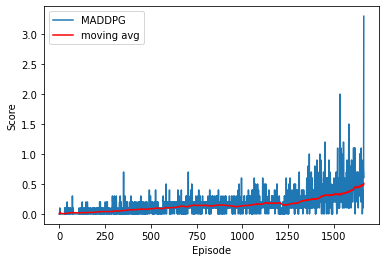

In [8]:
plt.figure()
plt.plot(scores, label='MADDPG')
plt.plot(avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper left')
plt.show()
plt.show()
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```